# Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import os

In [2]:
folder_path = "/kaggle/input/underway-pco-and-ocean-data-rv-j-clark-ross"

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

df.head()


,JD_GMT,DATE_UTC__ddmmyyyy,TIME_UTC_hh:mm:ss,LAT_dec_degree,LONG_dec_degree,xCO2_equ[umol/mol],Patm [hPa],Tequ [deg.C],SST [deg.C],Sal,pCO2_sw[uatm],pCO2_atm[uatm],fCO2_sw[uatm],fCO2_atm[uatm],xCO2atm_dry[umol/mol],Pequ [hPa]
0,7.6910,07/01/2019,16:35:00,-52.6318,-62.2689,380.41,997.69,9.81,8.75,33.74,354.00,393.58,352.64,392.06,404.14,994.48
1,7.6938,07/01/2019,16:39:00,-52.6314,-62.2417,360.27,997.69,9.78,8.75,33.74,335.63,393.58,334.34,392.06,404.14,994.80
2,7.6972,07/01/2019,16:44:00,-52.6309,-62.2140,352.18,997.69,9.75,8.75,33.74,328.46,393.58,327.19,392.06,404.14,995.20
3,7.7000,07/01/2019,16:48:00,-52.6304,-62.1867,356.39,997.69,9.51,8.75,33.74,335.98,393.58,334.68,392.06,404.14,994.71
4,7.7090,07/01/2019,17:01:00,-52.6293,-62.1128,355.02,997.69,9.31,8.75,33.74,337.47,393.58,336.17,392.06,404.14,994.91


# Exploratory Data Analysis (EDA)

## Variable Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24562 entries, 0 to 24561
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   JD_GMT                 24562 non-null  float64
 1   DATE_UTC__ddmmyyyy     24562 non-null  object 
 2   TIME_UTC_hh:mm:ss      24562 non-null  object 
 3   LAT_dec_degree         24562 non-null  float64
 4   LONG_dec_degree        24562 non-null  float64
 5   xCO2_equ[umol/mol]     24562 non-null  float64
 6   Patm [hPa]             24562 non-null  float64
 7   Tequ [deg.C]           24562 non-null  float64
 8   SST [deg.C]            24562 non-null  float64
 9   Sal                    24562 non-null  float64
 10  pCO2_sw[uatm]          24562 non-null  float64
 11  pCO2_atm[uatm]         20377 non-null  float64
 12  fCO2_sw[uatm]          24562 non-null  float64
 13  fCO2_atm[uatm]         20377 non-null  float64
 14  xCO2atm_dry[umol/mol]  20377 non-null  float64
 15  Pe

Di dapatkan 16 fitur dalam dataset yaitu: 
1. **JD_GMT** *(Julian Date - Greenwich Mean Time)*  
   Format waktu dalam **Julian Date**, yang digunakan dalam astronomi dan ilmiah untuk menyatakan tanggal dalam satuan hari sejak 1 Januari 4713 SM.  
2. **DATE_UTC__ddmmyyyy** *(Tanggal UTC - Hari/Bulan/Tahun)*  
   Tanggal pencatatan data dalam format **ddmmyyyy** (misalnya, *01012022* berarti 1 Januari 2022).  
3. **TIME_UTC_hh:mm:ss** *(Waktu UTC - Jam:Menit:Detik)*  
   Waktu pencatatan dalam **Coordinated Universal Time (UTC)** dalam format jam:menit:detik.  
4. **LAT_dec_degree** *(Latitude dalam Derajat Desimal)*  
   Posisi lintang lokasi pengambilan data dalam **derajat desimal**.  
   **Nilai positif** → Belahan bumi **utara** (N).  
   **Nilai negatif** → Belahan bumi **selatan** (S).  
5. **LONG_dec_degree** *(Longitude dalam Derajat Desimal)*  
   Posisi bujur dalam **derajat desimal**.  
   **Nilai positif** → Bujur **timur** (E).  
   **Nilai negatif** → Bujur **barat** (W).  
6. **xCO2_equ[umol/mol]** *(Konsentrasi CO₂ pada Keseimbangan - Mikromol per Mol)*  
   Konsentrasi **karbon dioksida (CO₂)** dalam air yang telah mencapai **keseimbangan dengan atmosfer**.  
   Diukur dalam **mikromol per mol (μmol/mol)**.  
7. **Patm [hPa]** *(Tekanan Atmosfer dalam Hektopascal)*  
   Tekanan atmosfer di lokasi pengukuran dalam **hektopascal (hPa)**.  
   Tekanan standar di permukaan laut biasanya sekitar **1013 hPa**.  
8. **Tequ [deg.C]** *(Suhu Keseimbangan dalam Derajat Celcius)*  
   Suhu pada titik **keseimbangan gas-air** dalam **derajat Celsius**.  
9. **SST [deg.C]** *(Sea Surface Temperature - Suhu Permukaan Laut dalam Derajat Celsius)*  
   Suhu permukaan air laut dalam **derajat Celsius**.  
   Parameter penting untuk mempelajari **perubahan iklim dan sirkulasi laut**.  
10. **Sal** *(Salinitas atau Kadar Garam dalam PSU - Practical Salinity Unit)*  
   Mengukur **kadar garam dalam air laut**.  
   Satuan yang digunakan biasanya **PSU (Practical Salinity Unit)**, di mana air laut rata-rata memiliki salinitas **sekitar 35 PSU**.  
11. **pCO2_sw[uatm]** *(Tekanan Parsial CO₂ di Air Laut dalam Mikro Atmosfer)*  
   **Tekanan parsial karbon dioksida (CO₂) dalam air laut** dalam satuan **μatm (mikro atmosfer)**.  
   Semakin tinggi nilai ini, semakin banyak CO₂ yang terlarut dalam air laut.  
12. **pCO2_atm[uatm]** *(Tekanan Parsial CO₂ di Atmosfer dalam Mikro Atmosfer)*  
   **Tekanan parsial CO₂ di atmosfer** dalam satuan **μatm**.  
   Digunakan untuk membandingkan konsentrasi CO₂ antara laut dan atmosfer.  
13. **fCO2_sw[uatm]** *(Tekanan Parsial CO₂ yang Disesuaikan dengan Faktor Aktivitas di Laut)*  
   Sama seperti **pCO2_sw**, tetapi dikoreksi dengan faktor aktivitas untuk memperhitungkan kelarutan CO₂ di air laut.  
14. **fCO2_atm[uatm]** *(Tekanan Parsial CO₂ yang Disesuaikan dengan Faktor Aktivitas di Atmosfer)*  
   Sama seperti **pCO2_atm**, tetapi dikoreksi dengan faktor aktivitas untuk memperhitungkan pengaruh tekanan dan suhu udara.  
15. **xCO2atm_dry[umol/mol]** *(Konsentrasi CO₂ Kering di Atmosfer dalam Mikromol per Mol)*  
   **Konsentrasi karbon dioksida di udara kering** dalam **μmol/mol**.  
   Ini adalah nilai konsentrasi CO₂ setelah menghilangkan pengaruh kelembaban udara.  
16. **Pequ [hPa]** *(Tekanan di Kamar Keseimbangan dalam Hektopascal)*  
   Tekanan udara dalam **ruang keseimbangan** di mana pengukuran pCO₂ dilakukan.  
   Digunakan untuk memperbaiki dan menyesuaikan data pCO₂ agar lebih akurat.

**Nama fitur-fitur tersebut kemudian diubah kedalam bahasa indonesia agar memudahkan pemahaman data.**

In [4]:
rename_columns = {
    "JD_GMT": "waktu_julian",
    "LAT_dec_degree": "latitude",
    "LONG_dec_degree": "longitude",
    "xCO2_equ[umol/mol]": "kadar_CO2_air",
    "Patm [hPa]": "tekanan_udara",
    "Tequ [deg.C]": "suhu_air_sensor",
    "SST [deg.C]": "suhu_permukaan_laut",
    "Sal": "salinitas",
    "pCO2_sw[uatm]": "tekanan_CO2_air",
    "pCO2_atm[uatm]": "tekanan_CO2_udara",
    "fCO2_sw[uatm]": "fraksi_CO2_air",
    "fCO2_atm[uatm]": "fraksi_CO2_udara",
    "xCO2atm_dry[umol/mol]": "kadar_CO2_kering",
    "Pequ [hPa]": "tekanan_air",
    "DATE_UTC__ddmmyyyy": "tanggal",
    "TIME_UTC_hh:mm:ss": "waktu"
}

df.rename(columns=rename_columns, inplace=True)

df.head()

,waktu_julian,tanggal,waktu,latitude,longitude,kadar_CO2_air,tekanan_udara,suhu_air_sensor,suhu_permukaan_laut,salinitas,tekanan_CO2_air,tekanan_CO2_udara,fraksi_CO2_air,fraksi_CO2_udara,kadar_CO2_kering,tekanan_air
0,7.6910,07/01/2019,16:35:00,-52.6318,-62.2689,380.41,997.69,9.81,8.75,33.74,354.00,393.58,352.64,392.06,404.14,994.48
1,7.6938,07/01/2019,16:39:00,-52.6314,-62.2417,360.27,997.69,9.78,8.75,33.74,335.63,393.58,334.34,392.06,404.14,994.80
2,7.6972,07/01/2019,16:44:00,-52.6309,-62.2140,352.18,997.69,9.75,8.75,33.74,328.46,393.58,327.19,392.06,404.14,995.20
3,7.7000,07/01/2019,16:48:00,-52.6304,-62.1867,356.39,997.69,9.51,8.75,33.74,335.98,393.58,334.68,392.06,404.14,994.71
4,7.7090,07/01/2019,17:01:00,-52.6293,-62.1128,355.02,997.69,9.31,8.75,33.74,337.47,393.58,336.17,392.06,404.14,994.91


In [5]:
df.describe()

,waktu_julian,latitude,longitude,kadar_CO2_air,tekanan_udara,suhu_air_sensor,suhu_permukaan_laut,salinitas,tekanan_CO2_air,tekanan_CO2_udara,fraksi_CO2_air,fraksi_CO2_udara,kadar_CO2_kering,tekanan_air
count,24562.000000,24562.000000,24562.000000,24562.000000,24562.000000,24562.000000,24562.000000,24562.000000,24562.000000,20377.000000,24562.000000,20377.000000,20377.000000,24562.000000
mean,150.156486,-21.835279,-28.354026,342.694316,1001.735633,4.253473,3.507942,33.908490,326.589724,399.406330,325.233348,397.731567,404.411858,1000.628761
std,111.322763,59.321802,24.141010,61.334341,14.837393,3.636853,3.711282,0.777884,56.378693,9.628078,56.137822,9.580840,6.539164,13.760195
min,7.691000,-77.918900,-69.498800,153.554616,951.110000,-1.300000,-1.900000,28.207371,148.049041,357.870000,147.391673,356.350000,369.750000,949.610000
25%,59.085417,-61.297600,-43.609525,296.882500,991.890000,1.710000,0.880000,33.730000,284.762500,393.800000,283.590000,392.140000,401.440000,990.861950
50%,98.748600,-55.269750,-33.614850,348.541125,1001.017112,3.130000,2.500000,33.900000,334.770000,399.290000,333.440000,397.660000,403.190000,999.960000
75%,225.873625,57.646563,-8.885350,396.577500,1012.798617,6.729375,6.000787,34.200000,375.687500,404.120000,374.087500,402.440000,405.640000,1011.453000
max,354.775700,79.781200,30.036300,485.520000,1033.455361,15.143500,14.443700,35.336181,463.170000,481.980000,461.150000,479.940000,480.100000,1030.140000


## Univariate Analysis

In [6]:
numerical_features = [
    "waktu_julian", "latitude", "longitude", "kadar_CO2_air", 
    "tekanan_udara", "suhu_air_sensor", "suhu_permukaan_laut", "salinitas", 
    "tekanan_CO2_air", "tekanan_CO2_udara", "fraksi_CO2_air", "fraksi_CO2_udara", 
    "kadar_CO2_kering", "tekanan_air"
]

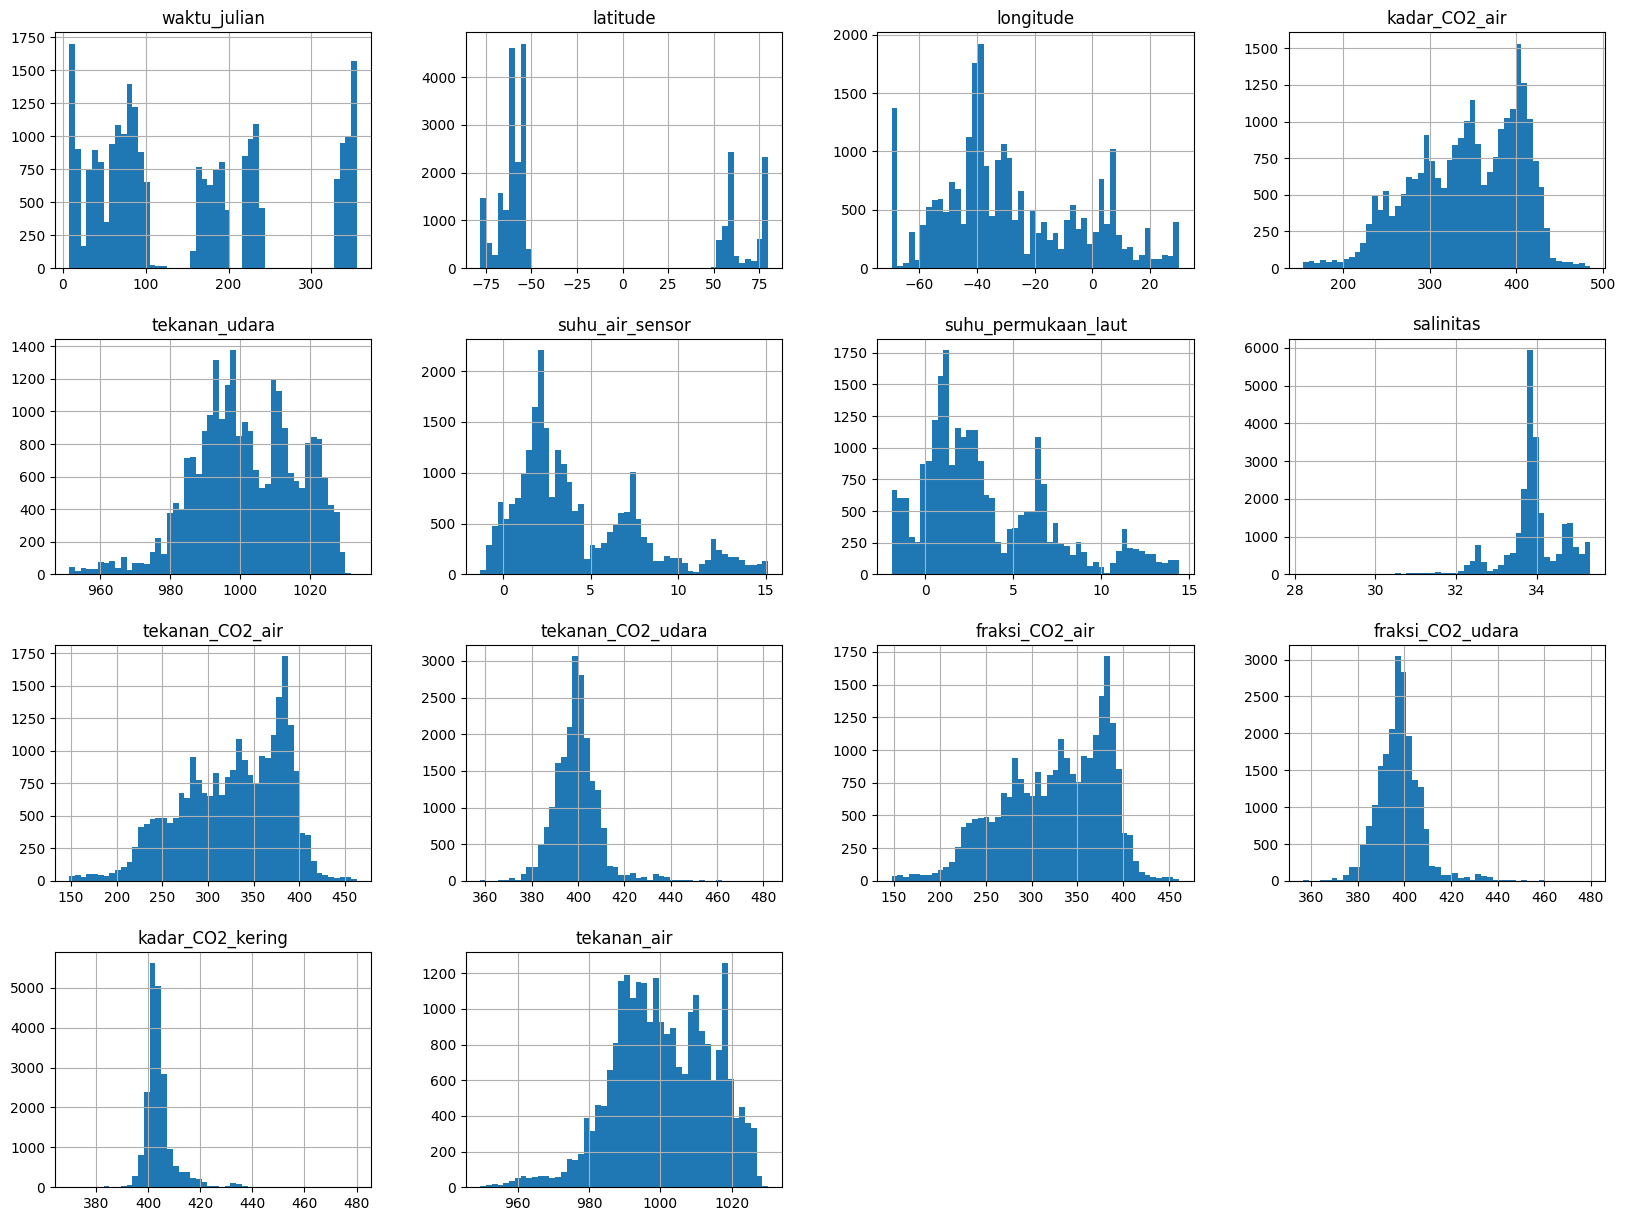

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### **Dari grafik di atas dapat diketahui:**  

1. **Waktu Julian** (Range: 0 hingga sekitar 365) 
   - Distribusi menunjukkan beberapa puncak, kemungkinan terkait dengan musim atau periode pengambilan data.

2. **Latitude** (Range: Sekitar -75 hingga 75)  
   - Distribusi menunjukkan beberapa kluster, menandakan data diambil dari berbagai lokasi.

3. **Longitude** (Range: Sekitar -75 hingga 25)
   - Distribusi bervariasi dengan beberapa puncak, menunjukkan wilayah dengan banyak pengambilan sampel.

4. **Kadar CO₂ air** (Range: Sekitar 200 hingga 500)
   - Distribusi miring ke kanan dengan kepadatan tinggi antara 300–400.

5. **Tekanan Udara** (Range: Sekitar 960 hingga 1020)
   - Distribusi menyerupai distribusi normal dengan puncak sekitar 1000.

6. **Suhu Air Sensor** (Range: 0 hingga 15)
   - Terdapat beberapa kluster data yang bisa menunjukkan kondisi lingkungan berbeda.

7. **Suhu Permukaan Laut** (Range: 0 hingga 15)
   - Pola distribusi mirip dengan suhu air sensor.

8. **Salinitas** (Range: 28 hingga 34)
   - Sebagian besar data berada di kisaran 32–34, menunjukkan karakteristik perairan tertentu.

9. **Tekanan CO₂ Air** (Range: 150 hingga 450)
   - Distribusi cenderung normal dengan puncak sekitar 300–400.

10. **Tekanan CO₂ Udara** (Range: 360 hingga 480)
    - Memiliki distribusi yang sangat terpusat dengan puncak sekitar 400.

11. **Fraksi CO₂ Air**  (Range: 150 hingga 450)
    - Pola distribusi mirip dengan tekanan CO₂ air.

12. **Fraksi CO₂ Udara** (Range: 360 hingga 480)
    - Memiliki distribusi sangat terpusat di sekitar 400.

13. **Kadar CO₂ Kering** (Range: 400 hingga 480)
    - Distribusi mirip dengan tekanan CO₂ udara dan fraksi CO₂ udara.

14. **Tekanan Air** (Range: 960 hingga 1020)
    - Pola distribusi mirip dengan tekanan udara.

Dari analisis ini, terlihat beberapa variabel memiliki distribusi normal, sementara yang lain menunjukkan kluster atau distribusi miring. Ini bisa menjadi indikasi bahwa beberapa faktor memiliki korelasi dengan lokasi atau musim.

## Multivariate Analysis: Correlation Matrix 

#### untuk mengukur besar korelasi antarfitur

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

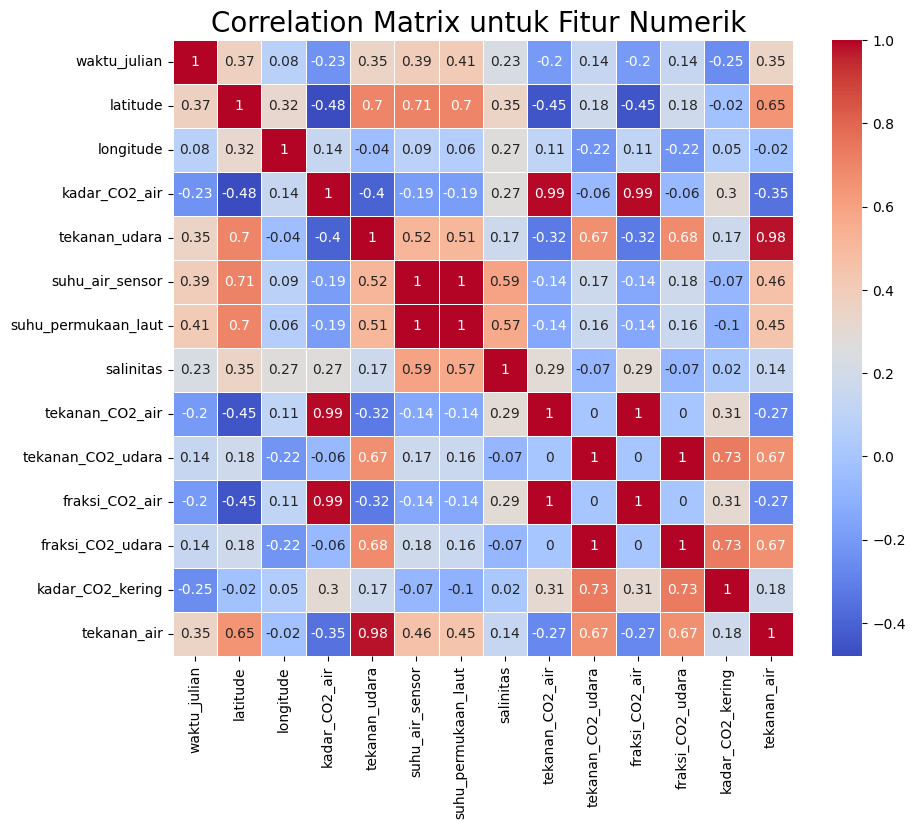

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Grafik diatas menunjukkan keragaman korelasi antarfitur. Dengan nilai 1 yang menunjukkan korelasi tertinggi (sangat berkorelasi). Dapat disimpulkan fitur yang paling berkorelasi dengan salinitas adalah tekanan udara, suhu air sensor, suhu permukaan laut, tekanan air, dan kadar CO2 air.

### Kemudian dibuat grafik untuk menunjukan korelasi salinitas terhadap fitur - fitur diatas

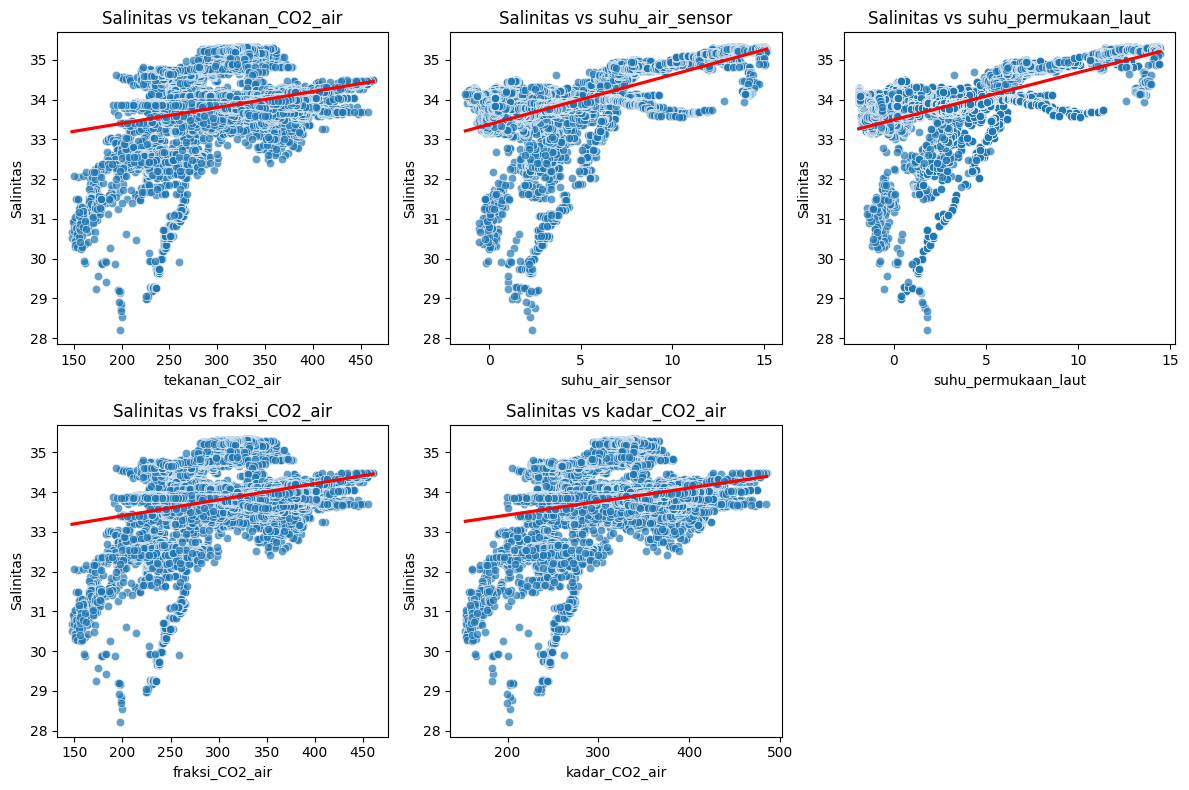

In [9]:
features = ["tekanan_CO2_air", "suhu_air_sensor", "suhu_permukaan_laut", "fraksi_CO2_air", "kadar_CO2_air"]

# Set ukuran figure
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df["salinitas"], alpha=0.7)
    sns.regplot(x=df[feature], y=df["salinitas"], scatter=False, color='red')
    plt.xlabel(feature)
    plt.ylabel("Salinitas")
    plt.title(f"Salinitas vs {feature}")

plt.tight_layout()
plt.show()


### fitur tekanan CO2 air, suhu air sensor, suhu permukaan laut, fraksi CO2 air dan kadar CO2 air memiliki korelasi yang positif terhadap salinitas.

# Data Preparation

## Drop unused Features

In [10]:
df.drop(columns=["tanggal", "waktu", "waktu_julian", "latitude", "longitude", "tekanan_CO2_udara", "tekanan_air", "tekanan_udara", "fraksi_CO2_udara", "kadar_CO2_kering" ], inplace=True)
df.head()

,kadar_CO2_air,suhu_air_sensor,suhu_permukaan_laut,salinitas,tekanan_CO2_air,fraksi_CO2_air
0,380.41,9.81,8.75,33.74,354.00,352.64
1,360.27,9.78,8.75,33.74,335.63,334.34
2,352.18,9.75,8.75,33.74,328.46,327.19
3,356.39,9.51,8.75,33.74,335.98,334.68
4,355.02,9.31,8.75,33.74,337.47,336.17


## Check missing value

In [11]:
df.isnull().sum()

kadar_CO2_air          0
suhu_air_sensor        0
suhu_permukaan_laut    0
salinitas              0
tekanan_CO2_air        0
fraksi_CO2_air         0
dtype: int64

In [12]:
df.shape

(24562, 6)

## Check Outliers

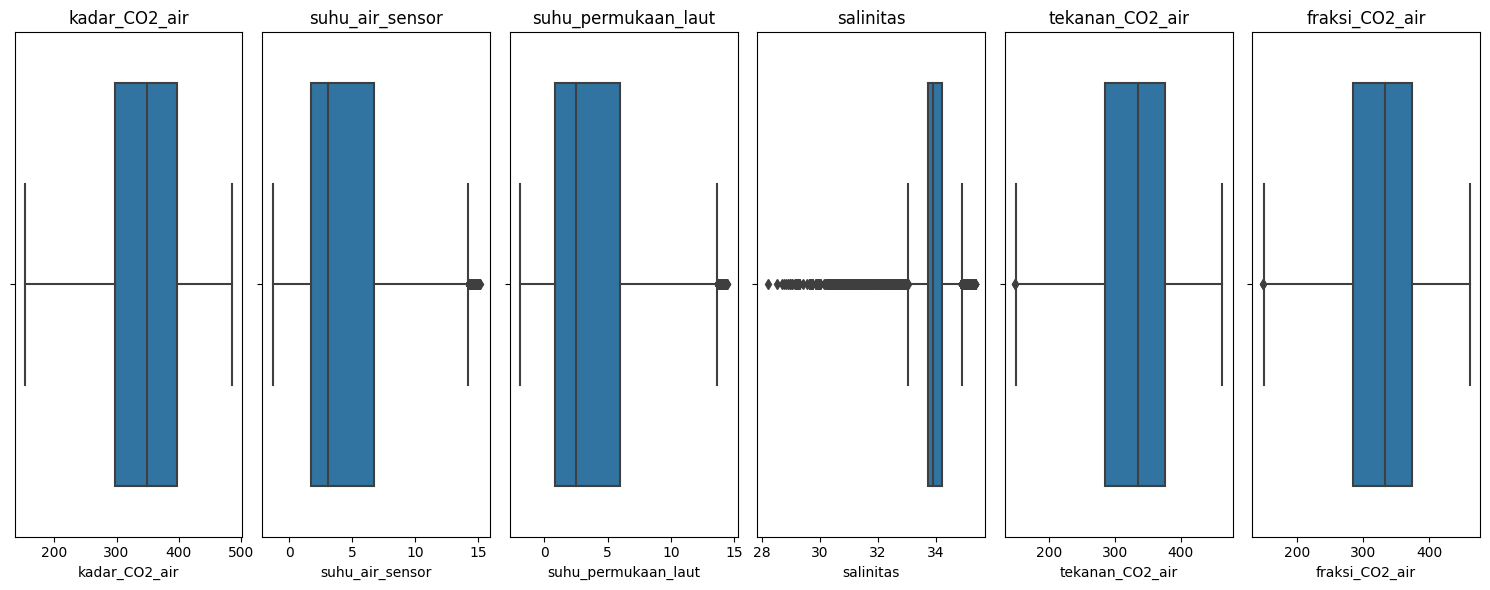

In [13]:
num_features = df.select_dtypes(include=['number']).columns

num_plots = len(num_features)
rows = (num_plots // 6) + (num_plots % 6 > 0)  # Atur jumlah baris secara otomatis
fig, axes = plt.subplots(nrows=rows, ncols=6, figsize=(15, 6 * rows))

# Flatten axes untuk iterasi yang lebih mudah
axes = axes.flatten()

# Plot masing-masing boxplot di subplot
for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Dari grafik diketahui terdapat outliers pada fitur "fraksi_CO2_air", "suhu_air_sensor", "suhu_permukaan_laut", "salinitas", dan "tekanan_CO2_air"

## Handling Outliers using IQR Method

In [14]:
numerical_outlier = [
    "fraksi_CO2_air", "suhu_air_sensor", "suhu_permukaan_laut", "salinitas", "tekanan_CO2_air"
]

In [15]:
Q1 = df[numerical_outlier].quantile(0.25)
Q3 = df[numerical_outlier].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
df = df[~((df[numerical_outlier] < lower_bound) | (df[numerical_outlier] > upper_bound)).any(axis=1)]
df.shape

(19879, 6)

### Dataset berkurang menjadi 19879 sampel

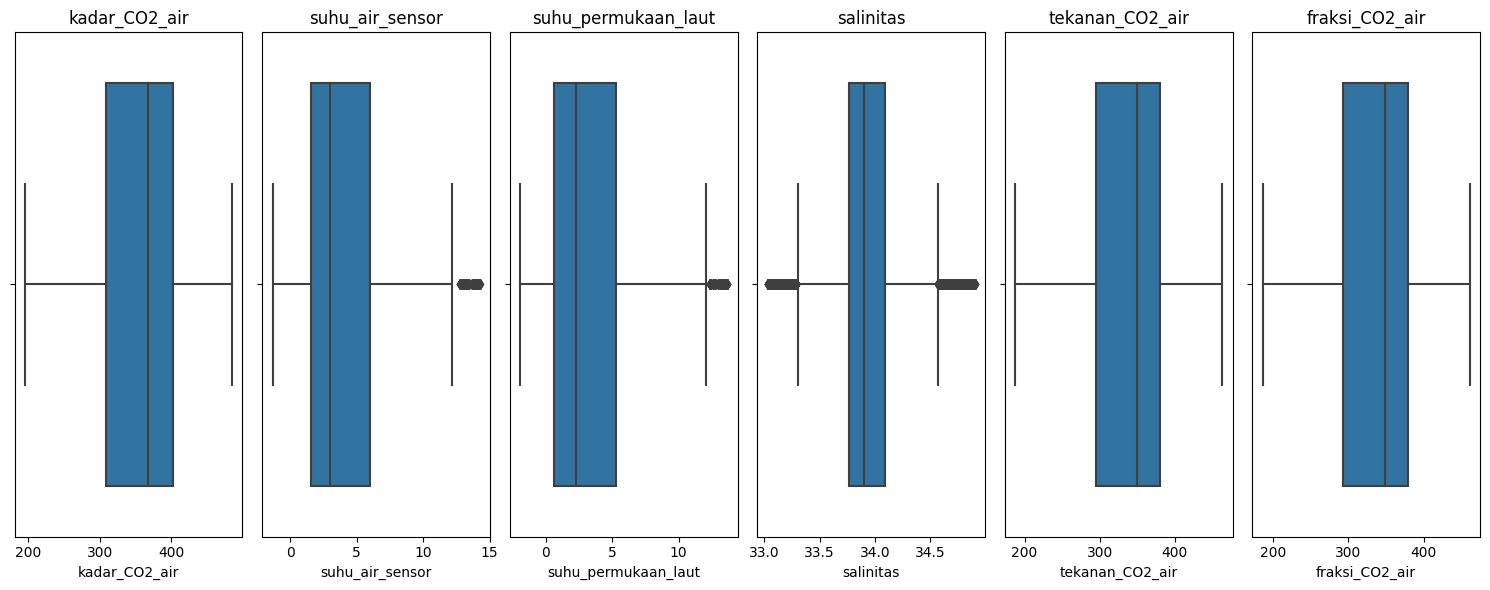

In [16]:
num_features = df.select_dtypes(include=['number']).columns

# Tentukan jumlah subplot
num_plots = len(num_features)
rows = (num_plots // 6) + (num_plots % 6 > 0)  # Atur jumlah baris secara otomatis
fig, axes = plt.subplots(nrows=rows, ncols=6, figsize=(15, 6 * rows))

# Flatten axes untuk iterasi yang lebih mudah
axes = axes.flatten()

# Plot masing-masing boxplot di subplot
for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Terlihat perbedaan sebelum dan sesudah dilakukannya IQR, data menjadi lebih bersih dari outliers

## Dimensionality Reduction with PCA

In [17]:
from sklearn.decomposition import PCA

features_suhu = ["suhu_air_sensor", "suhu_permukaan_laut"]
features_CO2 = ["fraksi_CO2_air", "tekanan_CO2_air"]

pca_suhu = PCA(n_components=1, random_state=42)
df["komponen_suhu"] = pca_suhu.fit_transform(df[features_suhu]).flatten()

pca_CO2 = PCA(n_components=1, random_state=42)
df["komponen_CO2"] = pca_CO2.fit_transform(df[features_CO2]).flatten()


df.drop(features_suhu + features_CO2, axis=1, inplace=True)

In [18]:
print(f"Variansi yang dijelaskan oleh komponen suhu: {pca_suhu.explained_variance_ratio_[0]:.2f}")
print(f"Variansi yang dijelaskan oleh komponen CO2: {pca_CO2.explained_variance_ratio_[0]:.2f}")

Variansi yang dijelaskan oleh komponen suhu: 1.00
Variansi yang dijelaskan oleh komponen CO2: 1.00


## Train-Test-Split

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["salinitas"]) 
y = df["salinitas"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")


Jumlah data latih: 17891
Jumlah data uji: 1988


## Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["komponen_suhu","komponen_CO2", "kadar_CO2_air"]

scaler = StandardScaler()

scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

X_train[numerical_features].head()


,komponen_suhu,komponen_CO2,kadar_CO2_air
3815,-0.098601,1.749395,-1.750625
16223,-0.286316,-1.190951,1.070838
14307,-1.119436,-1.348233,1.145885
12494,-0.494794,-0.949442,1.079038
23502,-0.023967,-0.165759,0.052452


In [21]:
X_train[numerical_features].describe().round(4)

,komponen_suhu,komponen_CO2,kadar_CO2_air
count,17891.0000,17891.0000,17891.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.6549,-2.4346,-2.8391
25%,-0.7100,-0.8379,-0.8279
50%,-0.1933,-0.2307,0.2081
75%,0.8449,0.8234,0.8389
max,3.7253,2.9098,2.3226


In [22]:
df.head()

,kadar_CO2_air,salinitas,komponen_suhu,komponen_CO2
0,380.41,33.74,8.601156,-23.289123
1,360.27,33.74,8.580350,2.640529
2,352.18,33.74,8.559544,12.766304
3,356.39,33.74,8.393099,2.152611
4,355.02,33.74,8.254395,0.045438


# Modeling

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

## Grid Search 

In [44]:
from tabulate import tabulate

def grid_search_model(X, y):
    algos = {
        'KNN': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [5, 7, 9, 11, 13, 15],
                'weights': ['uniform', 'distance']
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 150],
                'max_depth': [8, 16, 32],
                'random_state': [42]
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7]
            }
        }
    }

    scores = []
    best_models = {} 
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=123)

    for algo_name, config in algos.items():
        print(f"Training {algo_name}...")
        gs = GridSearchCV(config['model'], config['params'], cv=cv, scoring='r2', n_jobs=-1)
        gs.fit(X, y)
        best_models[algo_name] = gs.best_estimator_
        scores.append({
            'Model': algo_name,
            'Best Score': round(gs.best_score_, 4), 
            'Best Params': gs.best_params_
        })

    df_results = pd.DataFrame(scores)

    print(tabulate(df_results, headers="keys", tablefmt="grid"))

    return df_results, best_models 

results, best_models = grid_search_model(X_train, y_train)

Training KNN...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
+----+-------------------+--------------+-------------------------------------------------------------+
|    | Model             |   Best Score | Best Params                                                 |
+====+===================+==============+=============================================================+
|  0 | KNN               |       0.8811 | {'n_neighbors': 5, 'weights': 'distance'}                   |
+----+-------------------+--------------+-------------------------------------------------------------+
|  1 | Random Forest     |       0.871  | {'max_depth': 32, 'n_estimators': 100, 'random_state': 42}  |
+----+-------------------+--------------+-------------------------------------------------------------+
|  2 | Gradient Boosting |       0.8447 | {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150} |
+----+-------------------+--------------+-----------------------------------

- KNN memiliki skor tertinggi (0.8811) dengan **n_neighbors = 5** dan **weights = 'distance'**, menunjukkan bahwa model KNN dengan bobot berbasis jarak bekerja paling optimal dalam skenario ini.  
- Random Forest memiliki skor **0.871**, dengan **max_depth = 32**, **n_estimators = 100**, dan **random_state = 42**, yang menunjukkan bahwa model ini tetap kuat dengan kedalaman pohon yang cukup besar dan jumlah estimator yang optimal.  
- Gradient Boosting memiliki skor **0.8455**, dengan **learning_rate = 0.1**, **max_depth = 7**, dan **n_estimators = 150**, menunjukkan bahwa model ini bekerja cukup baik tetapi masih berada di bawah performa KNN dan Random Forest.  
- XGBoost memiliki skor **0.8568**, dengan **learning_rate = 0.1**, **max_depth = 7**, dan **n_estimators = 150**, yang mirip dengan Gradient Boosting tetapi menunjukkan sedikit peningkatan dalam performa.

## Best Algorithm

In [25]:
# KNN
best_knn = best_models['KNN']

# Random Forest
best_rf = best_models['Random Forest']

# Gradient Boosting
best_gb = best_models['Gradient Boosting']

# XGBoost
best_xgb = best_models['XGBoost']


# Evaluation

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

model_dict = {
    'KNN': best_knn,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'XGBoost': best_xgb
}

results = []
mse = pd.DataFrame(columns=['Train MSE', 'Test MSE'], index=model_dict.keys())


for name, model in model_dict.items():
    y_pred = model.predict(X_test)
    
    results.append([name, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)])
    
    # Hitung MSE untuk train & test
    mse.loc[name] = [mean_squared_error(y_train, model.predict(X_train)), 
                     mean_squared_error(y_test, y_pred)]

df_results = pd.DataFrame(results, columns=['Model', 'MSE', 'R²'])


df_results


,Model,MSE,R²
0,KNN,0.018832,0.883616
1,Random Forest,0.019849,0.877331
2,Gradient Boosting,0.023799,0.852915
3,XGBoost,0.021162,0.869215


In [36]:
mse

,Train MSE,Test MSE
KNN,0.0,0.018832
Random Forest,0.002558,0.019849
Gradient Boosting,0.010727,0.023799
XGBoost,0.012416,0.021162


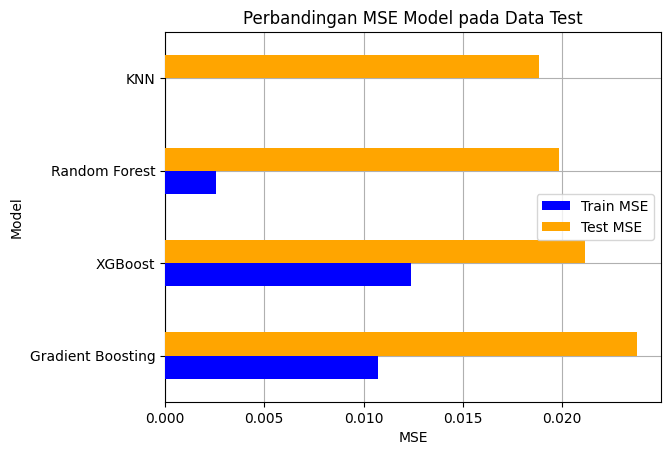

In [27]:
fig, ax = plt.subplots()
mse.sort_values(by='Test MSE', ascending=False).plot(kind='barh', ax=ax, zorder=3, color=['blue', 'orange', 'green', 'red'])
ax.set_title("Perbandingan MSE Model pada Data Test")
ax.set_xlabel("MSE")
ax.set_ylabel("Model")
ax.grid(zorder=0)
plt.show()


Berdasarkan evaluasi performa model menggunakan **Mean Squared Error (MSE)** dan **R²**, berikut adalah temuan utama:

- **KNN** menunjukkan performa terbaik dengan **MSE sebesar 0.0188** dan **R² sebesar 0.8836**, menandakan bahwa model ini memiliki kesalahan prediksi paling kecil serta kemampuan prediksi yang baik.
- **Random Forest** memiliki **MSE sebesar 0.0198** dan **R² sebesar 0.8773**, yang sedikit lebih rendah dibandingkan KNN tetapi tetap menunjukkan performa yang solid.
- **XGBoost** mencatat **MSE sebesar 0.0212** dan **R² sebesar 0.8692**, yang lebih baik dibandingkan Gradient Boosting tetapi masih di bawah KNN dan Random Forest.
- **Gradient Boosting** memiliki **MSE sebesar 0.0237** dan **R² sebesar 0.8534**, menunjukkan kesalahan prediksi yang lebih tinggi dibandingkan model lainnya.


- **KNN memiliki MSE sebesar 0.0 pada data latih**, yang menunjukkan bahwa model ini sepenuhnya menghafal data latih. Namun, model ini tetap mampu melakukan generalisasi yang baik pada data uji dengan MSE sebesar 0.0188.
- **Random Forest memiliki perbedaan kecil antara MSE latih (0.0026) dan MSE uji (0.0198)**, menunjukkan bahwa model ini mampu belajar dari pola data dengan baik tanpa mengalami overfitting.
- **Gradient Boosting dan XGBoost memiliki perbedaan kecil antara MSE latih dan uji**, tetapi MSE uji mereka tetap lebih tinggi dibandingkan KNN dan Random Forest. Ini menunjukkan bahwa meskipun model ini cukup baik dalam menangkap pola data, mereka tidak seoptimal KNN dan Random Forest dalam melakukan generalisasi.


In [28]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_Random Forest,prediksi_Gradient Boosting,prediksi_XGBoost
17068,33.46,33.5,33.5,33.5,33.500000
19145,34.15,34.1,34.1,34.1,34.099998
2816,33.94,33.8,33.9,34.0,34.099998
738,33.60,33.5,33.5,33.7,33.599998
9832,33.59,33.6,33.6,33.6,33.599998


- **Untuk data pertama (y_true = 33.46)**, semua model memberikan prediksi yang sangat dekat dengan nilai aktual, dengan KNN memprediksi 33.5 dan model lainnya memberikan nilai yang sama, yaitu 33.5.  
- **Pada data kedua (y_true = 34.15)**, semua model memberikan hasil yang hampir identik, dengan prediksi sebesar 34.1 untuk semua model.  
- **Pada data ketiga (y_true = 33.94)**, KNN memberikan prediksi sedikit lebih rendah (33.8), sementara Random Forest menghasilkan 33.9, sedangkan Gradient Boosting dan XGBoost memberikan prediksi tertinggi, yaitu 34.1.  
- **Pada data keempat (y_true = 33.60)**, KNN dan Random Forest memprediksi 33.5, sedangkan Gradient Boosting memberikan nilai sedikit lebih tinggi (33.7), dan XGBoost hampir sama dengan nilai aktual (33.6).  
- **Pada data kelima (y_true = 33.59)**, semua model memberikan prediksi yang sangat akurat, dengan nilai yang hampir identik dengan y_true, yaitu 33.6.  

Secara keseluruhan, semua model menunjukkan performa yang baik dengan prediksi yang sangat dekat dengan nilai aktual, terutama pada kasus-kasus di mana selisih antara y_true dan prediksi sangat kecil.